In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Previous Code for LinReg

In [ ]:
class LinReg(object):
    '''
    Linear regression Model
    ------------------------------------
    y = X@w
    X: A feature matrix
    w: weight vector
    y; Label Vector
    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000

    def predict(self, X:np.ndarray) -> np.ndarray:
        ''' Prediction of ouotput label for a given input

            Args:
                X: Feature matrix of shape (n, m+1).
                w: weight vector of shape (m+1,)

            Returns:
                y: Predicted label vector of shape (n,) 

        '''

        y = X @ self.w
        return y

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        '''Calculates loss for a model based on known labels
    
        Args:
            X: Feature matrix for given inputs
            y: Output label vector as predicted by the given model
            w: Weight vector

        Returns:
            Loss
        '''

        err = self.predict(X) - y
        return (1/2)*(np.transpose(err) @ err)

    def rmse(self, X: np.ndarray, y: np.ndarray) -> float:
        '''Calculate root mean square error of prediction wrt actual label.
        
        Args:
            X: Feature matrix for the given inputs
            y: output label vector as predicted by the given model

        Returns:
            Loss
        '''

        return np.sqrt((2/X.shape[0]) * self.loss(X, y))

    def fit(self, X:np.ndarray, y:np.ndarray) -> float:
        '''Estimates parameters of the linear regression model with normal equation.
    
        Args: 
            X: Feature matrix for given inputs.
            y: Actual label vector.

        Returns:
            Weight vector
        '''
        self.w = np.linalg.pinv(X) @ y 
        return self.w

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        '''Calculates gradients of loss dunction wrt weight vector on training set
    
        Arguments:

            X: Feature matrix for training data.
            y: Label vector for training data
            w: Weight vector

        Returns:
            A vector of gradients.
        '''

        return np.transpose(X) @ (self.predict(X) - y)
    
    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on the gradient of loss function.

        Weight updates are carried out with the fiollowing formula:
            w_new := w_old - lr * grad

        Args:
            1. w: Weight vector
            2. grad: gradient of loss w.r.t w
            3. lr: learning rate

        Returns:
            Updated weight vector
        '''

        return (self.w - lr*grad)

    def learning_schedule(self, t) -> float:
        lr = (self.t0) / (t + self.t1)
        return lr

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
        '''Estimates parameters of linear regression model through gradient descent.
    
        Arguments:
            X: Feature matrix for training data
            y: Label vector for training data
            lr: learning rate
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vectors acrss different iterations
        '''
        self.w = np.zeros((X.shape[1])) # parameter vector initialised to zero
        self.w_all = [] #all paramenter across iterations
        self.err_all = [] # all arrors across iterations



        #Gradient descent loop
        for i in np.arange(0, num_epochs):

            #Gradient Calulation
            dJdW = self.calculate_gradient(X, y)

            self.w_all.append(self.w)

            #calculate arror due to the current weight vector:
            self.err_all.append(self.loss(X, y))

            #Weight vector update.
            self.w = self.update_weights(dJdW, lr)

        return self.w
    
    def mbgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, batch_size: int) -> np.ndarray:

        '''Estimates parametrs of linear regression model through gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_iters: Number of iterations.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
         Weight vector acosss different iterations
        
        '''
        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))
        
        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i + batch_size]
                yi = y_shuffled[i: i + batch_size]
            
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi))

                dJdW = 2/batch_size * self.calculate_gradient(xi, yi)

                self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
            
        return self.w
    
    def sgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int) -> np.ndarray:

        '''Estimates parametrs of linear regression model through stochastic gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_epochs: Number of epochs.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vector acosss different iterations
        '''

        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index: random_index + 1]
                yi = y[random_index: random_index + 1]
            
                self. err_all.append(self.loss(xi, yi))
                self.w_all.append(self.w)

                gradients = 2 * self.calculate_gradient(xi, yi)
                lr = self.learning_schedule(epoch * X.shape[0] + i)

                self.w = self.update_weights(gradients, lr)
            

        return self.w

## Polynomial Transformation

In [ ]:
import itertools
import functools

def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    #reduce(lambda x, y: x * y, items, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x * y, items)

In [ ]:
{items: compute_new_features(items) for items in get_combinations([1], 3)}

{(1, 1, 1): 1}

In [ ]:
{items: compute_new_features(items) for items in get_combinations([2,3], 3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [ ]:
{items: compute_new_features(items) for items in get_combinations([1, 4], 4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [ ]:
def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix.
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.transpose() #transposes the feature matrix
    features = [np.ones(len(x))] # populates 1s as the first features

    if logging:
        print ("Input:", x)
    
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print (items, ":", compute_new_features(items))

    if logging:
        print(np.asarray(features).transpose())

    return np.asarray(features).transpose()

In [ ]:
polynomial_transform(np.array([2]), 3, logging=True)

Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
polynomial_transform(np.array([2, 3]), 2, logging=True)

Input: [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

## Synthetic Data

In [ ]:
def create_nonlin_training_set(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale=std, size = x.shape)

    return x, y

def nonlin(x):
    return np.sin(2 * np.pi * x)

## Visualization

In [ ]:
def visualize_training_data(X_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    plt.scatter(X_train, y_train, facecolor="none", edgecolors="b", s= 50, label='training data')
    plt.plot(points, output, c='g', label="$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def visualise_model_fit(X, y, lin_reg, degree):
    '''plots trained model along with the data genration function'''

    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0:
        plt.scatter(X, y, facecolor="none", edgecolors="b", s =50, label ='training data')

    plt.plot(points, output, c="g", label = "$\sin(2\pi x)$")

    y_hat = lin_reg.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$") 
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.title("M={}".format(degree))

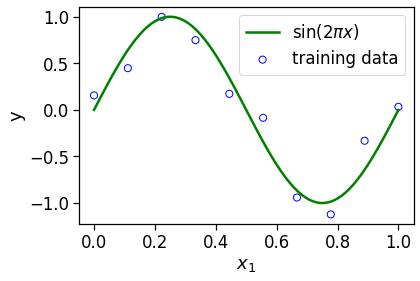

In [ ]:
num_samples = 10
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

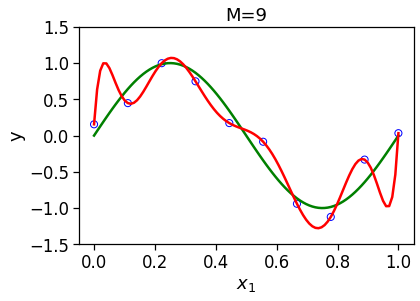

In [ ]:
degree = 9
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualise_model_fit(X, y, lin_reg, degree)

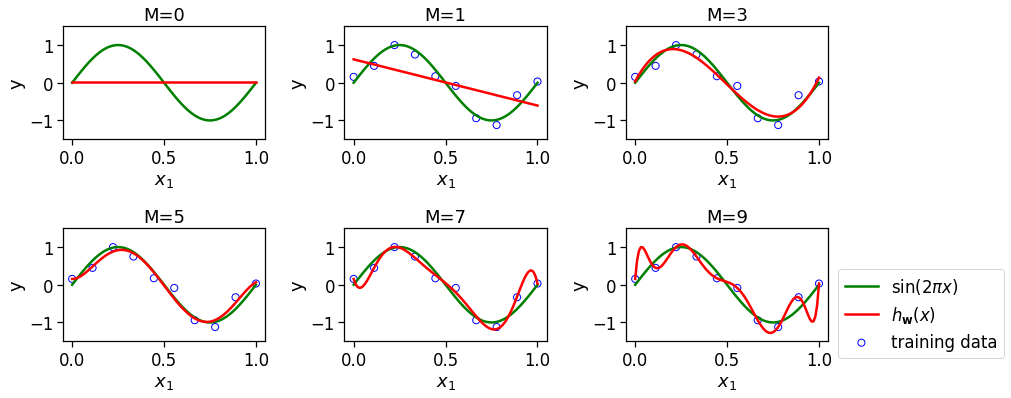

In [ ]:
f = plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualise_model_fit(X, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

## Model Selection

In [ ]:
import pandas as pd

def convert_dict_to_df(w_dict, degree):
    poly_w_dict = {i: np.array(np.zeros(degree)) for i in range(degree)}
    for deg in poly_w_dict:
        weight_vec = w_dict[deg]
        for i in range(len(weight_vec)):
            poly_w_dict[deg][i] = weight_vec[i]
    
    poly_w_df = pd.DataFrame(poly_w_dict)
    poly_w_df.columns = ['w_' + str(i) for i in range(degree)]
    return poly_w_df

def plot_model_selection(training_errors, val_errors):
    plt.plot(training_errors, 'o-', mfc="none", mec="b", ms = "10", c="b", label = "Training error")
    plt.plot(val_errors, 'o-', mfc="none", mec="r", ms = "10", c="r", label="Validation error" )
    plt.legend()
    plt.xlabel("degree")
    plt.xlabel('RMSE')
    plt.show()

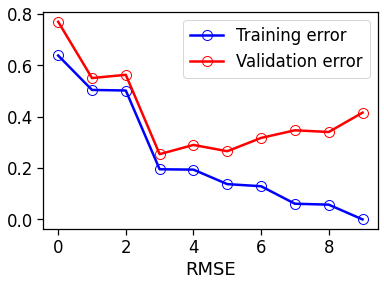

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,0.007676,0.620918,0.698856,0.035770,0.060478,0.153386,0.136103,0.155076,0.156302,0.155478
1,0.000000,-1.226484,-1.752564,9.164664,8.238108,-0.225806,4.386315,-16.132191,-24.905819,61.131728
2,0.000000,0.000000,0.526080,-28.247091,-23.567986,46.983989,-9.916983,328.654414,505.587193,-1481.730244
3,0.000000,0.000000,0.000000,19.182114,11.677015,-187.749900,57.157218,-1950.609846,-3285.139402,14615.359560
4,0.000000,0.000000,0.000000,0.000000,3.752549,232.340948,-240.936152,5436.147739,10470.586756,-73623.570960
5,0.000000,0.000000,0.000000,0.000000,0.000000,-91.435359,329.552889,-7949.290052,-18430.508225,210673.213171
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-140.329416,5867.679968,18095.767837,-357047.701881
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1716.574110,-9203.158520,354662.706270
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.646102,-190639.866121
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42780.336050


In [ ]:
training_errors = []
val_errors = []
w_dict = {}

X_val = np.linspace(0, 1, 100)
y_val = nonlin(X_val)

for i in range(10):
    X_transform = polynomial_transform(X, i)
    X_val_transform = polynomial_transform(X_val, i)

    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(X_val_transform, y_val + np.random.normal(scale=0.25, size=len(y_val))))

plot_model_selection(training_errors, val_errors)
convert_dict_to_df(w_dict, 10)

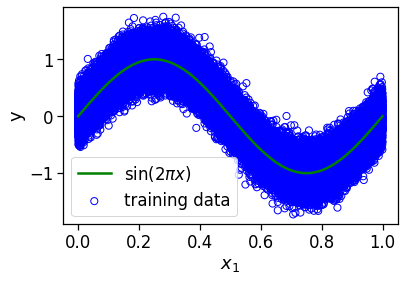

In [ ]:
num_samples = 100000
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

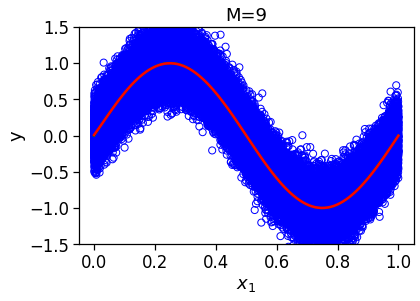

In [ ]:
degree = 9
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualise_model_fit(X, y, lin_reg, degree)

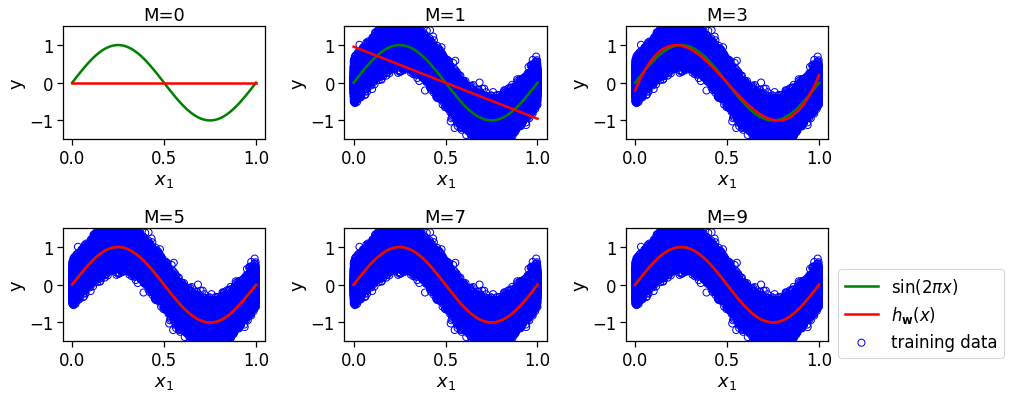

In [ ]:
f = plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualise_model_fit(X, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

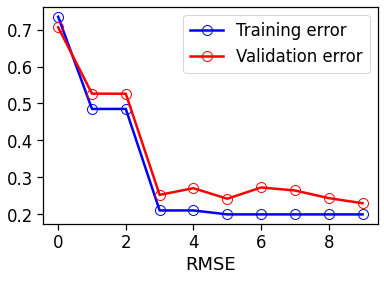

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,0.000074,0.955656,0.954212,-0.202363,-0.201238,0.018315,0.018410,-0.000276,0.003707,0.008699
1,0.000000,-1.911164,-1.902500,11.976747,11.954249,5.367184,5.363212,6.409770,6.122923,5.673584
2,0.000000,0.000000,-0.008664,-34.706956,-34.605715,11.504662,11.544387,-2.584736,2.435360,12.321516
3,0.000000,0.000000,0.000000,23.132195,22.974708,-99.987219,-100.146120,-21.649553,-58.464513,-150.738301
4,0.000000,0.000000,0.000000,0.000000,0.078744,138.411257,138.709198,-77.158304,60.899588,510.742180
5,0.000000,0.000000,0.000000,0.000000,0.000000,-55.333005,-55.595194,255.255356,-31.907070,-1291.478922
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087396,-224.416153,110.607874,2209.906288
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.143871,-140.973173,-2197.435005
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.279261,1143.775975
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-242.777047


In [ ]:
training_errors = []
val_errors = []
w_dict = {}

X_val = np.linspace(0, 1, 100)
y_val = nonlin(X_val)

for i in range(10):
    X_transform = polynomial_transform(X, i)
    X_val_transform = polynomial_transform(X_val, i)

    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(X_val_transform, y_val + np.random.normal(scale=0.25, size=len(y_val))))

plot_model_selection(training_errors, val_errors)
convert_dict_to_df(w_dict, 10)

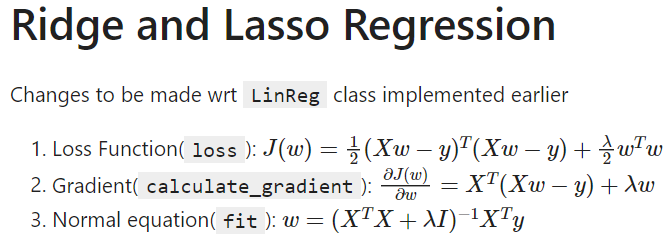

## LinReg Class from last lecture

In [ ]:
class LinReg(object):
    '''
    Linear regression Model
    ------------------------------------
    y = X@w
    X: A feature matrix
    w: weight vector
    y; Label Vector
    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000

    def predict(self, X:np.ndarray) -> np.ndarray:
        ''' Prediction of ouotput label for a given input

            Args:
                X: Feature matrix of shape (n, m+1).
                w: weight vector of shape (m+1,)

            Returns:
                y: Predicted label vector of shape (n,) 

        '''

        y = X @ self.w
        return y

    def loss(self, X: np.ndarray, y: np.ndarray, reg_rate: float) -> float:
        '''Calculates loss for a model based on known labels
    
        Args:
            X: Feature matrix for given inputs
            y: Output label vector as predicted by the given model
            w: Weight vector

        Returns:
            Loss
        '''

        err = self.predict(X) - y
        #return (1/2) * (np.transpose(err) @ err)
        return (1/2) * (np.transpose(err) @ err) + (reg_rate/2) * (np.transpose(self.w) @ self.w)

    def rmse(self, X: np.ndarray, y: np.ndarray, reg_rate:float) -> float:
        '''Calculate root mean square error of prediction wrt actual label.
        
        Args:
            X: Feature matrix for the given inputs
            y: output label vector as predicted by the given model

        Returns:
            Loss
        '''

        return np.sqrt((2/X.shape[0]) * self.loss(X, y, reg_rate))

    def fit(self, X:np.ndarray, y:np.ndarray, reg_rate: float) -> float:
        '''Estimates parameters of the linear regression model with normal equation.
    
        Args: 
            X: Feature matrix for given inputs.
            y: Actual label vector.

        Returns:
            Weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        eye = np.eye(np.size(X,1))
        self.w = np.linalg.solve(reg_rate * eye + X.T @ X, X.T @ y,)
        return self.w

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate: float) -> np.ndarray:
        '''Calculates gradients of loss dunction wrt weight vector on training set
    
        Arguments:

            X: Feature matrix for training data.
            y: Label vector for training data
            w: Weight vector

        Returns:
            A vector of gradients.
        '''

        return np.transpose(X) @ (self.predict(X) - y) + reg_rate * self.w
    
    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on the gradient of loss function.

        Weight updates are carried out with the fiollowing formula:
            w_new := w_old - lr * grad

        Args:
            1. w: Weight vector
            2. grad: gradient of loss w.r.t w
            3. lr: learning rate

        Returns:
            Updated weight vector
        '''

        return (self.w - lr*grad)

    def learning_schedule(self, t) -> float:
        lr = (self.t0) / (t + self.t1)
        return lr

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate: float) -> np.ndarray:
        '''Estimates parameters of linear regression model through gradient descent.
    
        Arguments:
            X: Feature matrix for training data
            y: Label vector for training data
            lr: learning rate
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vectors acrss different iterations
        '''
        self.w = np.zeros((X.shape[1])) # parameter vector initialised to zero
        self.w_all = [] #all paramenter across iterations
        self.err_all = [] # all arrors across iterations



        #Gradient descent loop
        for i in np.arange(0, num_epochs):

            #Gradient Calulation
            dJdW = self.calculate_gradient(X, y, reg_rate)

            self.w_all.append(self.w)

            #calculate arror due to the current weight vector:
            self.err_all.append(self.loss(X, y, 0))

            #Weight vector update.
            self.w = self.update_weights(dJdW, lr)

        return self.w
    
    def mbgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, batch_size: int, reg_rate: float) -> np.ndarray:

        '''Estimates parametrs of linear regression model through gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_iters: Number of iterations.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
         Weight vector acosss different iterations
        
        '''
        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))
        
        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i + batch_size]
                yi = y_shuffled[i: i + batch_size]
            
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi, 0))

                dJdW = 2/batch_size * self.calculate_gradient(xi, yi, reg_rate)

                self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
            
        return self.w
    
    def sgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, reg_rate: float) -> np.ndarray:

        '''Estimates parametrs of linear regression model through stochastic gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_epochs: Number of epochs.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vector acosss different iterations
        '''

        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index: random_index + 1]
                yi = y[random_index: random_index + 1]
            
                self. err_all.append(self.loss(xi, yi, 0))
                self.w_all.append(self.w)

                gradients = 2 * self.calculate_gradient(xi, yi, reg_rate)
                lr = self.learning_schedule(epoch * X.shape[0] + i)

                self.w = self.update_weights(gradients, lr)
            

        return self.w

In [ ]:
import unittest

class TestLossFunction((unittest.TestCase)):
    
    def test_loss_function(self):
        '''Test case for loss function of linear regression'''

        # Set up
        feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        label_vector = np.array([6,11])
        reg_rate = 0.01
        expected_loss = np.array([62.52])

        # call
        lin_reg = LinReg()
        lin_reg.w = weight_vector
        loss_value = lin_reg.loss(feature_matrix, label_vector, reg_rate)

        #asserts
        #test the shape
        self.assertEqual(loss_value.shape, ())

        #and contents
        np.testing.assert_array_equal(expected_loss, loss_value)

unittest.main(argv=[''], defaultTest = 'TestLossFunction', verbosity = 2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [ ]:
import unittest

class TestCalculateGradient(unittest.TestCase):

    def test_calculate_gradient(self):

        '''
        Test case for gradient descent
        '''

        #Set up
        feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        label_vector = np.array([6,11])
        reg_rate = 0.01
        expected_grad = np.array([15,105,50,95])

        #Call
        lin_reg = LinReg()
        lin_reg.w = weight_vector
        grad = lin_reg.calculate_gradient(feature_matrix, label_vector, reg_rate)

        #asserts
        #test the shape
        self.assertEqual(grad.shape, (4, ))

        #and contents
        np.testing.assert_array_almost_equal(expected_grad, grad, decimal=0)

unittest.main(argv=[''], defaultTest='TestCalculateGradient', verbosity=2,exit=False)

test_calculate_gradient (__main__.TestCalculateGradient)
Test case for gradient descent ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Ridge Regularisation for fixing overfitting in polynomial regression

In [ ]:
import itertools
import functools

def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    #reduce(lambda x, y: x * y, items, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x * y, items)

def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix.
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.transpose() #transposes the feature matrix
    features = [np.ones(len(x))] # populates 1s as the first features

    if logging:
        print ("Input:", x)
    
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print (items, ":", compute_new_features(items))

    if logging:
        print(np.asarray(features).transpose())

    return np.asarray(features).transpose()

def create_nonlin_training_set(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale=std, size = x.shape)

    return x, y

def nonlin(x):
    return np.sin(2 * np.pi * x)

def visualize_training_data(X_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    plt.scatter(X_train, y_train, facecolor="none", edgecolors="b", s= 50, label='training data')
    plt.plot(points, output, c='g', label="$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def visualise_model_fit(X, y, lin_reg, degree, reg_rate):
    '''plots trained model along with the data genration function'''

    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0:
        plt.scatter(X, y, facecolor="none", edgecolors="b", s =50, label ='training data')

    plt.plot(points, output, c="g", label = "$\sin(2\pi x)$")

    y_hat = lin_reg.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$") 
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.title("M={} $\lambda = {}$".format(degree, reg_rate))

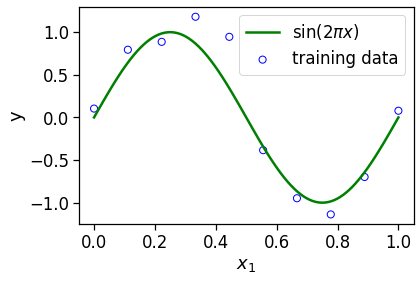

In [ ]:
num_samples = 10
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

### Polynomial models without regularisation

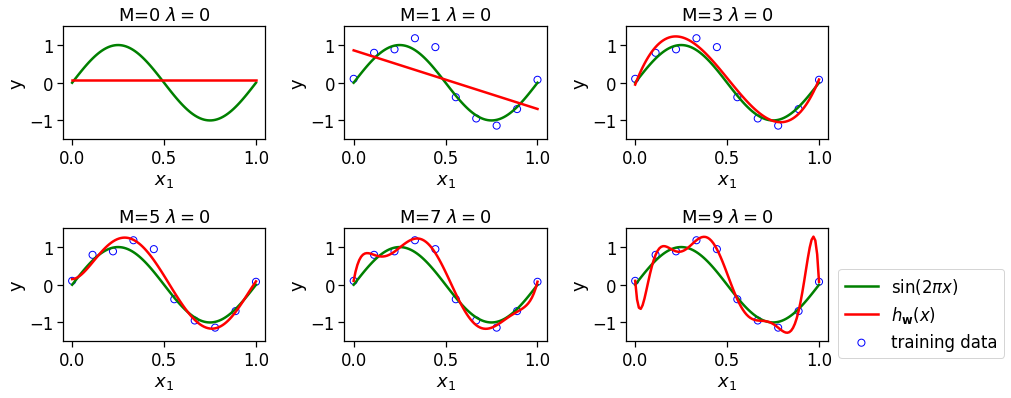

In [ ]:
f = plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y, reg_rate = 0)
    visualise_model_fit(X, y, lin_reg, degree, reg_rate = 0)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### Ridge regression


In [ ]:
f = plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y, reg_rate = 0)
    visualise_model_fit(X, y, lin_reg, degree, reg_rate = 0)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

## Model Selection

In [ ]:
import pandas as pd

def plot_reg_w(w_df):
    ax = plt.gca()
    ax.plot(w_df.T)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('$\mathbf{w}$')
    plt.title('Weights as a function of $\lambda$')
    plt.axis('tight')
    plt.show()

def plot_learning_curve(err_df):
    ax = plt.gca()
    ax.plot(err_df)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('$RMSE$')
    plt.title('Training and validation loss as a function of $\lambda$')
    plt.axis('tight')
    plt.legend(['training', 'validation'])
    plt.show()

In [ ]:
training_errors = {}
val_errors = {}
w_dict = {}
degree = 9

X_val = np.linspace(0, 1, 100)
y_val = nonlin(X_val)
 
X_transform = polynomial_transform(X, degree)
X_val_transform = polynomial_transform(X_val, degree)

for reg_rate in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:   
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y, reg_rate)

    w_dict[reg_rate] = lin_reg.w
    training_errors[reg_rate] = lin_reg.rmse(X_transform, y, reg_rate)
    val_errors[reg_rate] = lin_reg.rmse(X_val_transform, y_val + np.random.normal(scale=0.25, size=len(y_val)), reg_rate)

err_df = pd.DataFrame([training_errors, val_errors]).T
w_df = pd.DataFrame(w_dict)

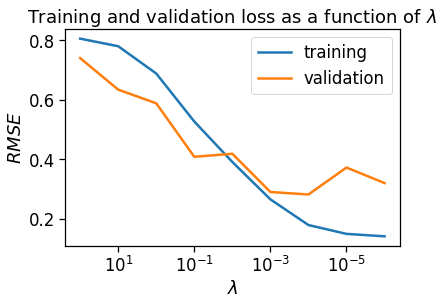

In [ ]:
plot_learning_curve(err_df)